In [2]:
import pandas as pd

In [2]:
queries_df = pd.read_csv("./MTG-QBH/metadata/Queries.csv")


In [3]:
queries_df.head()

Filename Query ID  Song ID                       Title Original artist  \
0   q1.wav       q1     1118          Mother natures son     The Beatles   
1   q2.wav       q2     1438            Scarborough fair         Unknown   
2   q3.wav       q3     1546          Stairway to heaven    Led Zeppelin   
3   q4.wav       q4     1579   Strawberry fields forever     The Beatles   
4   q5.wav       q5     1808        When I am sixty four     The Beatles   

   Class label  
0    mothernat  
1    scarborou  
2   stairway2h  
3   strawberry  
4     whenim64

In [4]:
queries_df.sort_values(by="Song ID")

Filename Query ID  Song ID                  Title  \
52    q53.wav      q53       14          Dos gardenias   
21    q22.wav      q22       19    Across the universe   
11    q12.wav      q12       19    Across the universe   
19    q20.wav      q20       60          Agua de beber   
117  q118.wav     q118       70          All my loving   
..        ...      ...      ...                    ...   
12    q13.wav      q13     2133        More than words   
51    q52.wav      q52     2146             Proud Mary   
6      q7.wav       q7     2179              The boxer   
94    q95.wav      q95     2208   That will be the day   
22    q23.wav      q23     2269        Octopuss garden   

                   Original artist   Class label  
52                      Bobby Capo      2gardeni  
21                     The Beatles        across  
11                     The Beatles        across  
19              Vinicius de Moraes     aguabeber  
117                    The Beatles   allmyloving  
..                             ...           ...  
12                         Extreme     morethwor  
51    Creedence Clearwater Revival     proudmary  
6              Simon and Garfunkel      theboxer  
94                    The Crickets    thatllbetd  
22                     The Beatles     octopusga  

[118 rows x 6 columns]

In [5]:
queries_df.groupby("Song ID").size().to_frame("count").sort_values(by='count', ascending=False)

count
Song ID       
1224         4
941          4
2056         3
1564         3
995          3
...        ...
1252         1
1396         1
1411         1
1438         1
2269         1

[81 rows x 1 columns]

In [6]:
queries_df[queries_df["Song ID"]==1224]

Filename Query ID  Song ID               Title Original artist Class label
8    q9.wav       q9     1224   Ob la di ob la da     The Beatles      obladi
20  q21.wav      q21     1224   Ob la di ob la da     The Beatles      obladi
37  q38.wav      q38     1224   Ob la di ob la da     The Beatles      obladi
70  q71.wav      q71     1224   Ob la di ob la da     The Beatles      obladi

In [7]:
queries_df.shape

(118, 6)

In [8]:
songs_df = pd.read_csv("./MTG-QBH/metadata/Collection_Canonicals.csv", encoding='latin1')

In [12]:
songs_df.head()

Song ID                 Title          Artist Original artist Canonical  \
0        1     One hundred years        The Cure        The Cure       YES   
1        4  10:15 saturday night        The Cure        The Cure       YES   
2        7     Seventeen seconds        The Cure        The Cure       YES   
3       14         Dos gardenias  Antonio Machin      Bobby Capo       YES   
4       15    Six different ways        The Cure        The Cure       YES   

  Class label  
0    100years  
1     1015sat  
2      17secs  
3    2gardeni  
4  6different

In [13]:
songs_df.shape

(481, 6)

In [16]:
!pip install librosa

In [17]:
!pip install basic-pitch

In [18]:
!pip install -U demucs

In [19]:
!pip install mir_eval

<Axes: >

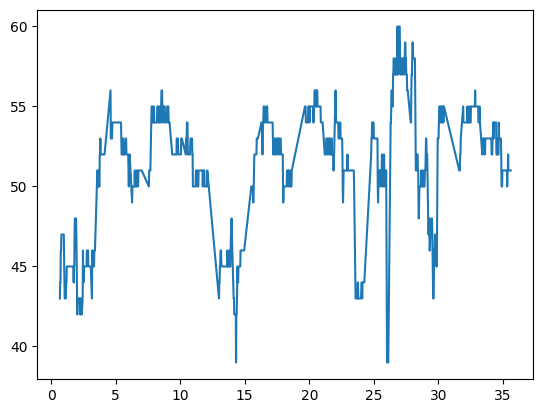

In [26]:
import librosa
import numpy as np
from IPython.display import display
from IPython.display import Audio
import seaborn as sns
import matplotlib.pyplot as plt

import mir_eval.sonify

import matplotlib.pyplot as plt

def display_wav(y, sr):
    fig, ax = plt.subplots(nrows=3, sharex=True)
    librosa.display.waveshow(y, sr=sr, ax=ax[0])
    ax[0].set(title='Audio')
    ax[0].label_outer()
    display(fig)
    
def extract_melody(y_wav, sr):
    f0, voiced_flag, voiced_probs = librosa.yin(y_wav, fmin=librosa.note_to_hz('C2'),fmax=librosa.note_to_hz('C7'))
    
    display_wav(y_wav, sr);
    
    onset_frames = librosa.onset.onset_detect(y=y_wav, sr=sr, units='frames')
    
    # print(onset_frames)
    
    onset_time = librosa.onset.onset_detect(y=y_wav, sr=sr, units='time')
    
    # print(onset_time)
    
    times = librosa.times_like(f0, sr=sr)
    vneg = (-1)**(~voiced_flag)
    f0_masked = np.ma.MaskedArray(f0, mask=~voiced_flag).compressed()
    times_masked = np.ma.MaskedArray(times, mask=~voiced_flag).compressed()
    midi_melody = librosa.hz_to_midi(f0_masked)
    midi_melody = np.round(midi_melody)
    
    melody_freq = librosa.midi_to_hz(midi_melody)
    y_f0 = mir_eval.sonify.pitch_contour(times_masked, melody_freq, sr )
    display(Audio(data=y_f0, rate=sr))

def query_by_humming(query_filename):
    y_raw, sr = librosa.load(f"MTG-QBH/audio/{query_filename}")
    
    # extract_melody(y_raw, sr)
    
    # y_raw, sr = librosa.load(librosa.ex('trumpet'))
    f0, voiced_flag, voiced_probs = librosa.pyin(y_raw, fmin=librosa.note_to_hz('C2'),fmax=librosa.note_to_hz('C7'))
    
    # f0 = librosa.yin(y_raw, fmin=librosa.note_to_hz('C2'),fmax=librosa.note_to_hz('C6'))
    # print(sr)
    # print(voiced_flag)
    # print(voiced_probs)
    times = librosa.times_like(f0, sr=sr)
    
    # print(times)
    # vneg = (-1)**(~voiced_flag)
    
    
    # print(f0)
    f0_masked = np.ma.MaskedArray(f0, mask=~voiced_flag).compressed()
    # f0_masked = f0
    times_masked = np.ma.MaskedArray(times, mask=~voiced_flag).compressed()
    # times_masked = times
    
    midi_melody = librosa.hz_to_midi(f0_masked)
    midi_melody = np.round(midi_melody)
#     print(midi_melody)
#     print(f0_masked)
#     print(midi_melody.shape)
#     print(f0_masked.shape)
    
    # display(sns.lineplot(x=times_masked,y=f0_masked))
    display(sns.lineplot(x=times_masked,y=midi_melody))
    chroma = librosa.feature.chroma_stft(y=y_raw, sr=sr)
    
    duration_total = librosa.get_duration(y=y_raw, sr=sr)
    frame_duration = duration_total/chroma.shape[1]
    times_segment = frame_duration * (1 + np.arange(chroma.shape[1]))
    
    # And sonify the f0 using mir_eval
    y_f0 = mir_eval.sonify.pitch_contour(times_masked, f0_masked, sr)
    
    display(Audio(data=y_f0, rate=sr))
    # y_f0 = mir_eval.sonify.clicks(times_masked, sr)
    # print(frame_duration)
    # y_f0 = mir_eval.sonify.chroma(chroma,times_segment, fs=sr)
    
    # tempo, beats = librosa.beat.beat_track(y=y_raw, sr=sr)
    # times = librosa.frames_to_time(beats, sr=sr)
    
    # times = librosa.onset.onset_detect(y=y_raw, sr=sr, units='time', backtrack=True, normalize=True)
    
    # y_f0 = mir_eval.sonify.clicks(times, sr)
    
    midi_melody = librosa.hz_to_midi(f0_masked)
    midi_melody = np.round(midi_melody)
    
    melody_freq = librosa.midi_to_hz(midi_melody)
    y_f1 = mir_eval.sonify.pitch_contour(times_masked, melody_freq, sr )
    
    display(Audio(data=y_f1, rate=sr))
    display(Audio(data=y_f0, rate=sr))
    display(Audio(data=y_raw, rate=sr))

    # img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
    # display(img)
    
query_by_humming('q28.wav')

In [ ]:
query_by_humming('q9.wav')

In [ ]:
query_by_humming('q21.wav')

In [ ]:
query_by_humming("q38.wav")

In [ ]:
query_by_humming("q71.wav")

In [ ]:
def pitch_to_midi(freqs):
    return 

In [ ]:
query_by_humming('q2.wav')

In [ ]:
query_by_humming('q30.wav')

In [18]:
from basic_pitch.inference import p
from basic_pitch import ICASSP_2022_MODEL_PATH

def wav_to_midi(query_file):
    model_output, midi_data, note_events = predict(f"MTG-QBH/audio/{query_file}")
    y_raw, sr = librosa.load(f"MTG-QBH/audio/{query_file}")
    wav = midi_data.synthesize()
    display(Audio(data=wav, rate=44100))
    display(Audio(data=y_raw, rate=sr))

    display(midi_data.key_signature_changes)
    display(midi_data.get_downbeats())
    display(midi_data.get_onsets())
    display(midi_data.get_end_time())

    print(type( midi_data.instruments[0].notes))
    durations = list(map(lambda x: x.duration, midi_data.instruments[0].notes))
    durations = np.asarray(durations)
    display(sns.histplot(durations, bins=100))
    display(min(durations))
    display(max(durations))

    display(len(durations))
    display((durations>0.14).sum())

    print(midi_data.instruments[0].notes[0].duration)
    filtered_notes = []
    for note in midi_data.instruments[0].notes:
        if(note.duration > 0.24):
            filtered_notes.append(note)
    midi_data.instruments[0].notes = filtered_notes


    wav2 = midi_data.synthesize()
    display(Audio(data=wav2, rate=44100))


ImportError: cannot import name 'p' from 'basic_pitch.inference' (/Users/artur.lubamdo/anaconda3/envs/datascience/lib/python3.11/site-packages/basic_pitch/inference.py)

In [ ]:
wav_to_midi("q71.wav")

In [3]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 12.9 MB/s eta 0:00:0000:010:01


In [74]:
cache = {}

In [ ]:
from basic_pitch.inference import predict
from basic_pitch import ICASSP_2022_MODEL_PATH
import nltk
from nltk.util import ngrams


def get_overlap_coef(a,b):
    a_set = set(a)
    b_set = set(b)
    inter_set = a_set.intersection(b_set)
    return len(inter_set)/min(len(a_set),len(b_set))

def get_n_gram_from_notes(notes, n):
    result = []
    l = len(notes)
    for idx, note in enumerate(notes):
        if(idx+1<l-1):
            diff = note.pitch - notes[idx+1].pitch
            diff = str(diff)
            result.append(diff)
    n_grams = ngrams(result, n)
    return [' '.join(grams) for grams in n_grams]      

def get_midi_n_grams(midi, n):
    result = []
    for inst in midi.instruments:
        if(not inst.is_drum):
            n_grams = get_n_gram_from_notes(inst.notes,n)
            result = result+n_grams
    return result

def get_query_wav(query_id):
    y_raw, sr = librosa.load(f"MTG-QBH/audio/{query_id}.wav")
    return y_raw, sr
def get_song_wav(song_id):
    y = {}
    y["vocals"], sr = librosa.load(f"output/htdemucs/{song_id}/vocals.wav")
    y["drums"], _ = librosa.load(f"output/htdemucs/{song_id}/drums.wav")
    y["other"],_ = librosa.load(f"output/htdemucs/{song_id}/other.wav")
    return y, sr
def get_query_basic_midi(query_id):
    if(query_id+"q" in cache):
        return cache[query_id+"q"]
    model_output, midi_data, note_events = predict(f"MTG-QBH/audio/{query_id}.wav")
    cache[query_id+"q"] = midi_data
    return midi_data
def get_song_basic_midi(song_id):
    if(song_id+"s" in cache):
        return cache[song_id+"s"]
    model_output, vocal_midi_data, note_events = predict(f"output/htdemucs/{song_id}/vocals.wav")
    cache[song_id+"s"] = vocal_midi_data
    return vocal_midi_data

def query_wav_to_midi(query_wav):
    return None

def song_wav_to_midi(song_wav):
    return None

def similarity_basic(query_id, song_id):
    query_y, query_sr = get_query_wav(query_id)
    song_y, song_sr = get_song_wav(song_id)
    
    query_midi = get_query_basic_midi(query_id)
    song_midi = get_song_basic_midi(song_id)
    
    query_midi_wav = query_midi.synthesize()
    song_midi_wav = song_midi.synthesize()
    
    
    display(Audio(data=query_y, rate=query_sr))
    display(Audio(data=song_y["vocals"], rate=song_sr))
    display(Audio(data=query_midi_wav, rate=44100))
    display(Audio(data=song_midi_wav, rate=44100))
    
    query_grams = get_midi_n_grams(query_midi,4)
    query_grams = query_grams + get_midi_n_grams(query_midi,3)
    query_grams = query_grams + get_midi_n_grams(query_midi,5)
    
    song_grams = get_midi_n_grams(song_midi,4)
    song_grams = song_grams+get_midi_n_grams(song_midi,3)
    song_grams = song_grams+get_midi_n_grams(song_midi,5)
    
    return get_overlap_coef(query_grams, song_grams)
    
similarity_basic("q20", "60")

In [22]:
sample_song_df = songs_df.sample(30)

In [26]:
sample_song_df.head()

Song ID                  Title                  Artist  \
399     2056     Sweet home Alabama          Lynyrd Skynyrd   
269     1294        Pictures of you                The Cure   
153      758              If I Fell             The Beatles   
334     1592       Yellow submarine             The Beatles   
403     2072  All tomorrows parties  The Velvet Underground   

            Original artist Canonical   Class label  
399          Lynyrd Skynyrd       YES     sweethome  
269                The Cure       YES    picturesof  
153             The Beatles       YES       ififell  
334             The Beatles       YES     submarine  
403  The Velvet Underground       YES  alltomorrows

In [30]:
def append_vocals_midi(df):
    df["vocal_midi"] = df["Song ID"].apply(lambda x: get_song_basic_midi(str(x)))
    return df
sample_song_df = append_vocals_midi(sample_song_df)
sample_song_df.head()

Predicting MIDI for output/htdemucs/2056/vocals.wav...
Predicting MIDI for output/htdemucs/1294/vocals.wav...
Predicting MIDI for output/htdemucs/758/vocals.wav...
Predicting MIDI for output/htdemucs/1592/vocals.wav...
Predicting MIDI for output/htdemucs/2072/vocals.wav...
Predicting MIDI for output/htdemucs/1786/vocals.wav...
Predicting MIDI for output/htdemucs/2131/vocals.wav...
Predicting MIDI for output/htdemucs/1546/vocals.wav...
Predicting MIDI for output/htdemucs/776/vocals.wav...
Predicting MIDI for output/htdemucs/941/vocals.wav...
Predicting MIDI for output/htdemucs/1307/vocals.wav...
Predicting MIDI for output/htdemucs/1517/vocals.wav...
Predicting MIDI for output/htdemucs/1832/vocals.wav...
Predicting MIDI for output/htdemucs/1396/vocals.wav...
Predicting MIDI for output/htdemucs/1232/vocals.wav...
Predicting MIDI for output/htdemucs/782/vocals.wav...
Predicting MIDI for output/htdemucs/513/vocals.wav...
Predicting MIDI for output/htdemucs/1202/vocals.wav...
Predicting MIDI

Song ID                  Title                  Artist  \
399     2056     Sweet home Alabama          Lynyrd Skynyrd   
269     1294        Pictures of you                The Cure   
153      758              If I Fell             The Beatles   
334     1592       Yellow submarine             The Beatles   
403     2072  All tomorrows parties  The Velvet Underground   

            Original artist Canonical   Class label  \
399          Lynyrd Skynyrd       YES     sweethome   
269                The Cure       YES    picturesof   
153             The Beatles       YES       ififell   
334             The Beatles       YES     submarine   
403  The Velvet Underground       YES  alltomorrows   

                                            vocal_midi  
399  <pretty_midi.pretty_midi.PrettyMIDI object at ...  
269  <pretty_midi.pretty_midi.PrettyMIDI object at ...  
153  <pretty_midi.pretty_midi.PrettyMIDI object at ...  
334  <pretty_midi.pretty_midi.PrettyMIDI object at ...  
403  <pretty_midi.pretty_midi.PrettyMIDI object at ...

In [32]:
sample_song_df["vocal_midi"].iloc[0].synthesize()

array([0., 0., 0., ..., 0., 0., 0.])

In [33]:
sample_song_df.to_pickle("./testing.pkl")

In [24]:
queries_df[queries_df["Query ID"] == 'q28']

Filename Query ID  Song ID       Title Original artist Class label
27  q28.wav      q28      941   Let it be     The Beatles     letitbe

In [31]:
test_songs_df = pd.DataFrame({"songId":["1","14","15","4","7", "19", "60"]})
test_queries_df = pd.DataFrame({"queryId":["q53","q22","q12","q20"]})
test_df = test_queries_df.merge(test_songs_df, how='cross')
test_df

queryId songId
0      q53      1
1      q53     14
2      q53     15
3      q53      4
4      q53      7
5      q53     19
6      q53     60
7      q22      1
8      q22     14
9      q22     15
10     q22      4
11     q22      7
12     q22     19
13     q22     60
14     q12      1
15     q12     14
16     q12     15
17     q12      4
18     q12      7
19     q12     19
20     q12     60
21     q20      1
22     q20     14
23     q20     15
24     q20      4
25     q20      7
26     q20     19
27     q20     60

In [30]:
test_df["similarity"] = test_df.apply(lambda x: similarity_basic(x["queryId"],x["songId"]), axis=1)
test_df = test_df.sort_values(by="similarity", ascending=False)
test_df["col"] = 1

NameError: name 'test_df' is not defined

In [61]:
queries_df.sort_values(by="Song ID")

Filename Query ID  Song ID                  Title  \
52    q53.wav      q53       14          Dos gardenias   
21    q22.wav      q22       19    Across the universe   
11    q12.wav      q12       19    Across the universe   
19    q20.wav      q20       60          Agua de beber   
117  q118.wav     q118       70          All my loving   
..        ...      ...      ...                    ...   
12    q13.wav      q13     2133        More than words   
51    q52.wav      q52     2146             Proud Mary   
6      q7.wav       q7     2179              The boxer   
94    q95.wav      q95     2208   That will be the day   
22    q23.wav      q23     2269        Octopuss garden   

                   Original artist   Class label  
52                      Bobby Capo      2gardeni  
21                     The Beatles        across  
11                     The Beatles        across  
19              Vinicius de Moraes     aguabeber  
117                    The Beatles   allmyloving  
..                             ...           ...  
12                         Extreme     morethwor  
51    Creedence Clearwater Revival     proudmary  
6              Simon and Garfunkel      theboxer  
94                    The Crickets    thatllbetd  
22                     The Beatles     octopusga  

[118 rows x 6 columns]

## Read Queries and Songs

In [156]:
queries_df = pd.read_pickle("./queries_with_midi.pkl")

In [157]:
queries_df.head()

Filename Query ID  Song ID                       Title Original artist  \
0   q1.wav       q1     1118          Mother natures son     The Beatles   
1   q2.wav       q2     1438            Scarborough fair         Unknown   
2   q3.wav       q3     1546          Stairway to heaven    Led Zeppelin   
3   q4.wav       q4     1579   Strawberry fields forever     The Beatles   
4   q5.wav       q5     1808        When I am sixty four     The Beatles   

   Class label                                   query_basic_midi  
0    mothernat  <pretty_midi.pretty_midi.PrettyMIDI object at ...  
1    scarborou  <pretty_midi.pretty_midi.PrettyMIDI object at ...  
2   stairway2h  <pretty_midi.pretty_midi.PrettyMIDI object at ...  
3   strawberry  <pretty_midi.pretty_midi.PrettyMIDI object at ...  
4     whenim64  <pretty_midi.pretty_midi.PrettyMIDI object at ...

In [158]:
songs_df = pd.read_pickle("./songs_with_midi.pkl")
songs_df.head()

Song ID                 Title          Artist Original artist Canonical  \
0        1     One hundred years        The Cure        The Cure       YES   
1        4  10:15 saturday night        The Cure        The Cure       YES   
2        7     Seventeen seconds        The Cure        The Cure       YES   
3       14         Dos gardenias  Antonio Machin      Bobby Capo       YES   
4       15    Six different ways        The Cure        The Cure       YES   

  Class label                                        vocals_midi  
0    100years  <pretty_midi.pretty_midi.PrettyMIDI object at ...  
1     1015sat  <pretty_midi.pretty_midi.PrettyMIDI object at ...  
2      17secs  <pretty_midi.pretty_midi.PrettyMIDI object at ...  
3    2gardeni  <pretty_midi.pretty_midi.PrettyMIDI object at ...  
4  6different  <pretty_midi.pretty_midi.PrettyMIDI object at ...

### Append Features in Dataframes

#### Metrics Based in OnSet Detect

In [171]:
import numpy as np
import nltk
from nltk.util import ngrams

In [173]:
# GET NOTES METRICS BASED ON ONSET DETECT
def compute_metrics(audio_file):
    y, sr = librosa.load(audio_file)
    times = librosa.onset.onset_detect(y=y, sr=sr, units='time')
    diff_list = []
    for  index, t in enumerate(times):
        if(index >0):
            diff_list.append(t- times[index-1])
    ratio_list = []
    for index, t in enumerate(diff_list):
        if(index >0):
            ratio_list.append(t/diff_list[index-1])
    
    def clean_ratio_list(raw_list):
        def closest(lst, K):
            lst = np.asarray(lst)
            idx = (np.abs(lst - K)).argmin()
            return lst[idx]

        times_proportions = [1,0.5,0.333,0.25,2,0.666,3, 1.5, 0.75, 4,1.333]
        
        result = []
        for index, elem in enumerate(raw_list):
            if(elem>4):
                result.append(str(round(elem)))
            else:
                result.append(str(closest(times_proportions,elem)))
        return result        
    return clean_ratio_list(ratio_list)

def get_query_metric(row):
    return compute_metrics(f"MTG-QBH/audio/{row['Query ID']}.wav")

def get_ngram_from_list(input_list, n):
    n_grams = ngrams(input_list, n)
    return [' '.join(grams) for grams in n_grams]      
def get_vocal_metric(row):
    return compute_metrics(f"output/htdemucs/{row['Song ID']}/vocals.wav")

In [170]:
queries_df["metric"] = queries_df.apply(lambda row: get_query_metric(row), axis=1)

In [174]:
songs_df["vocals_metric"] = songs_df.apply(lambda row: get_vocal_metric(row), axis=1)

#### Onset Midi Melody Filter

In [320]:
def is_inside_beat(note, start, end):
    if(start <= note.start and note.start<= end):
        return True
    if(start <= note.end and note.end<= end):
        return True
    return False

def get_notes_between(notes, start, end):
    return list(filter(lambda x: is_inside_beat(x, start, end), notes))
def get_longest_inside_beat(notes, start, end):
    candidates = get_notes_between(notes, start, end)
    if(len(candidates)>0):
        max_duration = 0
        selected = None
        for cand in candidates:
            dur = min(end, cand.end) - max(start,cand.start)
            if(max_duration < dur):
                max_duration = dur
                selected = cand        
        if(selected is not None):
            note = copy.deepcopy(selected)
            note.start = start
            note.end = start+max_duration
            return note
    return None

def get_all_notes_from(midi):
    notes= []
    for inst in midi.instruments:
        notes = notes + inst.notes
    return notes
    
def clean_midi_based_onset(y, sr, midi):
    times = librosa.onset.onset_detect(y=y, sr=sr, units='time')
    all_notes = get_all_notes_from(midi)
    result_notes = []
    for index, t in enumerate(times):
        if(index< len(times)-1):
            note = get_longest_inside_beat(all_notes, t, times[index+1])
            if(note is not None):
                result_notes.append(note)
                
    copy_midi = copy.deepcopy(midi)
    copy_midi.instruments[0].notes = result_notes
    return copy_midi
def compute_on_set_melody(audio_path, midi):
    y, sr = librosa.load(audio_path)
    return clean_midi_based_onset(y,sr, midi)

def get_query_clean_midi(row):
    midi = row['query_basic_midi']
    return compute_on_set_melody(f"MTG-QBH/audio/{row['Query ID']}.wav", midi )

queries_df["clean_midi_onset"] = queries_df.apply(lambda r: get_query_clean_midi(r), axis=1)

In [324]:

def get_song_clean_midi(row):
    midi = row['vocals_midi']
    return compute_on_set_melody(f"output/htdemucs/{row['Song ID']}/vocals.wav", midi)

songs_df["vocal_clean_midi"] = songs_df.apply(lambda r: get_song_clean_midi(r), axis=1)

In [325]:
songs_df.head()

Song ID                 Title          Artist Original artist Canonical  \
0        1     One hundred years        The Cure        The Cure       YES   
1        4  10:15 saturday night        The Cure        The Cure       YES   
2        7     Seventeen seconds        The Cure        The Cure       YES   
3       14         Dos gardenias  Antonio Machin      Bobby Capo       YES   
4       15    Six different ways        The Cure        The Cure       YES   

  Class label                                        vocals_midi  \
0    100years  <pretty_midi.pretty_midi.PrettyMIDI object at ...   
1     1015sat  <pretty_midi.pretty_midi.PrettyMIDI object at ...   
2      17secs  <pretty_midi.pretty_midi.PrettyMIDI object at ...   
3    2gardeni  <pretty_midi.pretty_midi.PrettyMIDI object at ...   
4  6different  <pretty_midi.pretty_midi.PrettyMIDI object at ...   

                                       vocals_metric  \
0  [0.333, 0.75, 2.0, 0.5, 0.333, 1.333, 66, 0.25...   
1  [4.0, 0.25, 1.0, 1.0, 1.0, 0.25, 0.5, 1.0, 1.5...   
2  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, ...   
3  [0.333, 1.333, 0.75, 1.0, 0.75, 3.0, 0.333, 1....   
4  [0.25, 1.0, 1.333, 1.5, 0.25, 4.0, 1.333, 0.25...   

                               vocals_metric_4_grams  \
0  [0.333 0.75 2.0 0.5, 0.75 2.0 0.5 0.333, 2.0 0...   
1  [4.0 0.25 1.0 1.0, 0.25 1.0 1.0 1.0, 1.0 1.0 1...   
2  [1.0 1.0 1.0 1.0, 1.0 1.0 1.0 1.0, 1.0 1.0 1.0...   
3  [0.333 1.333 0.75 1.0, 1.333 0.75 1.0 0.75, 0....   
4  [0.25 1.0 1.333 1.5, 1.0 1.333 1.5 0.25, 1.333...   

                                    vocal_clean_midi  
0  <pretty_midi.pretty_midi.PrettyMIDI object at ...  
1  <pretty_midi.pretty_midi.PrettyMIDI object at ...  
2  <pretty_midi.pretty_midi.PrettyMIDI object at ...  
3  <pretty_midi.pretty_midi.PrettyMIDI object at ...  
4  <pretty_midi.pretty_midi.PrettyMIDI object at ...

In [373]:
def get_n_gram_from_notes(notes, n):
    result = []
    l = len(notes)
    for idx, note in enumerate(notes):
        if(idx+1<l-1):
            diff = notes[idx+1].pitch - note.pitch
            # if(diff>0):
            #     result.append("U")
            # if(diff<0):
            #     result.append("D")    
            # else:
            diff = str(diff)
            result.append(diff)
    n_grams = ngrams(result, n)
    return [' '.join(grams) for grams in n_grams]

def get_midi_n_grams(midi, n):
    result = []
    for inst in midi.instruments:
        if(not inst.is_drum):
            n_grams = get_n_gram_from_notes(inst.notes,n)
            result = result+n_grams
    return result

def get_n_grams(midi):
    grams = get_midi_n_grams(midi,3)
    return grams

    

In [7]:
queries_df["query_n_grams"] = queries_df["query_basic_midi"].apply(get_n_grams)
queries_df.head()

Filename Query ID  Song ID                       Title Original artist  \
0   q1.wav       q1     1118          Mother natures son     The Beatles   
1   q2.wav       q2     1438            Scarborough fair         Unknown   
2   q3.wav       q3     1546          Stairway to heaven    Led Zeppelin   
3   q4.wav       q4     1579   Strawberry fields forever     The Beatles   
4   q5.wav       q5     1808        When I am sixty four     The Beatles   

   Class label                                   query_basic_midi  \
0    mothernat  <pretty_midi.pretty_midi.PrettyMIDI object at ...   
1    scarborou  <pretty_midi.pretty_midi.PrettyMIDI object at ...   
2   stairway2h  <pretty_midi.pretty_midi.PrettyMIDI object at ...   
3   strawberry  <pretty_midi.pretty_midi.PrettyMIDI object at ...   
4     whenim64  <pretty_midi.pretty_midi.PrettyMIDI object at ...   

                                       query_n_grams  
0  [0 0 2, 0 2 0, 2 0 0, 0 0 -2, 0 -2 0, -2 0 5, ...  
1  [0 0 0, 0 0 7, 0 7 0, 7 0 -5, 0 -5 0, -5 0 1, ...  
2  [2 -1 1, -1 1 1, 1 1 -1, 1 -1 0, -1 0 -3, 0 -3...  
3  [1 0 -1, 0 -1 -3, -1 -3 -1, -3 -1 U, -1 U 34, ...  
4  [0 U 15, U 15 -12, 15 -12 -3, -12 -3 0, -3 0 0...

In [8]:
# Mean Size Sets for Queries
queries_df["query_n_grams"].apply(lambda x: len(x)).mean()

58.610169491525426

In [9]:
songs_df["song_n_grams"] = songs_df["vocals_midi"].apply(get_n_grams)
songs_df.head()

Song ID                 Title          Artist Original artist Canonical  \
0        1     One hundred years        The Cure        The Cure       YES   
1        4  10:15 saturday night        The Cure        The Cure       YES   
2        7     Seventeen seconds        The Cure        The Cure       YES   
3       14         Dos gardenias  Antonio Machin      Bobby Capo       YES   
4       15    Six different ways        The Cure        The Cure       YES   

  Class label                                        vocals_midi  \
0    100years  <pretty_midi.pretty_midi.PrettyMIDI object at ...   
1     1015sat  <pretty_midi.pretty_midi.PrettyMIDI object at ...   
2      17secs  <pretty_midi.pretty_midi.PrettyMIDI object at ...   
3    2gardeni  <pretty_midi.pretty_midi.PrettyMIDI object at ...   
4  6different  <pretty_midi.pretty_midi.PrettyMIDI object at ...   

                                        song_n_grams  
0  [U 32 3, 32 3 D, 3 D 12, D 12 4, 12 4 0, 4 0 0...  
1  [8 -8 3, -8 3 U, 3 U 28, U 28 7, 28 7 D, 7 D U...  
2  [-2 0 11, 0 11 5, 11 5 12, 5 12 -9, 12 -9 9, -...  
3  [12 -12 12, -12 12 U, 12 U 19, U 19 U, 19 U 18...  
4  [0 0 0, 0 0 0, 0 0 0, 0 0 0, 0 0 D, 0 D -3, D ...

In [10]:
# Mean Size Sets for Songs
songs_df["song_n_grams"].apply(lambda x: len(x)).mean()

442.46985446985445

## Calculate Similarity Traditional

In [340]:
def get_overlap_coef(a,b):
    a_set = set(a)
    b_set = set(b)
    inter_set = a_set.intersection(b_set)
    return len(inter_set)/min(len(a_set),len(b_set))

def get_index_of_song_in_query(cross_df, query_id,song_id):
    query_results = cross_df[cross_df["Query ID"] == query_id]
    list_results = query_results["Song ID"].tolist()
    if(song_id in list_results):
        return list_results.index(song_id)+1
    else:
        return None
    
def inverse(num):
    return 1.0/num

def get_mrr(rank_list):
    result = {}
    ranks = rank_list[np.logical_not(np.isnan(rank_list))]
    inverted_ranks = inverse(ranks)
    result["mrr"] = inverted_ranks.mean()
    result["count"] = len(inverted_ranks)
    return result
def run_experiment(queries_df, songs_df,queries_set_col, songs_set_col):
    q_df = queries_df.copy()
    s_df = songs_df.copy()
    cross_df = q_df[["Query ID",queries_set_col]].merge(s_df[["Song ID",songs_set_col]], how="cross")
    cross_df["similarity"] = cross_df.apply(lambda row: get_overlap_coef(row[queries_set_col], row[songs_set_col]), axis=1)
    cross_df = cross_df.sort_values(by="similarity", ascending=False)
    q_df["index_search"] = q_df.apply(lambda x: get_index_of_song_in_query(cross_df, x["Query ID"], x["Song ID"]) , axis=1)
    
    q_df.sort_values(by="index_search")
    result = get_mrr(q_df["index_search"])
    result["mean_song_set_size"] = s_df[songs_set_col].apply(lambda x: len(x)).mean()
    result["mean_query_set_size"] = q_df[queries_set_col].apply(lambda x: len(x)).mean()
    result["index_search_mean"] = q_df["index_search"].mean()
    return result, q_df, cross_df


In [341]:

def run_experiment_metric(queries_df, songs_df, from_n, to_n):
    def get_multi_grams(set_list, from_n = 3, to_n=5):
        result = []
        for i in range(from_n, to_n+1):
            result = result + get_ngram_from_list(set_list,i)
        return result
    q_df = queries_df.copy()
    s_df = songs_df.copy()
    q_df["query_metric_set"] = q_df["metric"].apply(lambda x: get_multi_grams(x, from_n, to_n))
    s_df["song_metric_set"] = s_df["vocals_metric"].apply(lambda x: get_multi_grams(x, from_n, to_n))
    
    return run_experiment(q_df, s_df,"query_metric_set","song_metric_set")


In [210]:
run_experiment_metric(queries_df, songs_df,2,2)[0]

{'mrr': 0.012542949584111944,
 'count': 118,
 'mean_song_set_size': 346.41995841995845,
 'mean_query_set_size': 67.80508474576271,
 'index_search_mean': 190.4406779661017}

In [211]:
run_experiment_metric(queries_df, songs_df,3,3)[0]

{'mrr': 0.014425719213566297,
 'count': 118,
 'mean_song_set_size': 345.41995841995845,
 'mean_query_set_size': 66.80508474576271,
 'index_search_mean': 195.41525423728814}

In [209]:
run_experiment_metric(queries_df, songs_df,4,4)[0]

{'mrr': 0.014173575941758318,
 'count': 118,
 'mean_song_set_size': 344.41995841995845,
 'mean_query_set_size': 65.80508474576271,
 'index_search_mean': 203.60169491525423}

In [212]:
run_experiment_metric(queries_df, songs_df,5,5)[0]

{'mrr': 0.023622458798973105,
 'count': 118,
 'mean_song_set_size': 343.41995841995845,
 'mean_query_set_size': 64.80508474576271,
 'index_search_mean': 238.57627118644066}

In [213]:
run_experiment_metric(queries_df, songs_df,6,6)[0]

{'mrr': 0.018647684053378376,
 'count': 118,
 'mean_song_set_size': 342.41995841995845,
 'mean_query_set_size': 63.80508474576271,
 'index_search_mean': 226.10169491525423}

In [214]:
run_experiment_metric(queries_df, songs_df,7,7)[0]

{'mrr': 0.015417809278601166,
 'count': 118,
 'mean_song_set_size': 341.41995841995845,
 'mean_query_set_size': 62.80508474576271,
 'index_search_mean': 240.9322033898305}

In [234]:
result, _, cr_sim = run_experiment_metric(queries_df, songs_df,4,6)
result

{'mrr': 0.020980084561595693,
 'count': 118,
 'mean_song_set_size': 1030.2598752598753,
 'mean_query_set_size': 194.41525423728814,
 'index_search_mean': 206.27118644067798}

<Axes: >

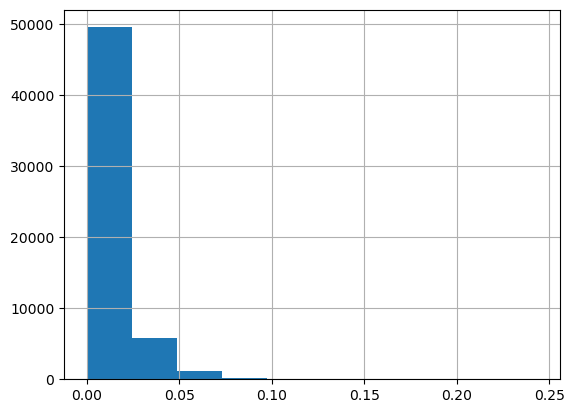

In [235]:
cr_sim["similarity"].hist()

In [218]:
run_experiment_metric(queries_df, songs_df,5,6)[0]

{'mrr': 0.01684000573191963,
 'count': 118,
 'mean_song_set_size': 685.8399168399169,
 'mean_query_set_size': 128.61016949152543,
 'index_search_mean': 239.78813559322035}

In [342]:

def run_experiment_midi(queries_df, songs_df,midi_to_gram = None,):
    q_df = queries_df.copy()
    s_df = songs_df.copy()
    q_df["query_n_grams"] = q_df["query_basic_midi"].apply(midi_to_gram)
    s_df["song_n_grams"] = s_df["vocals_midi"].apply(midi_to_gram)
   
    return run_experiment(q_df, s_df,"query_n_grams","song_n_grams")


In [343]:
run_experiment_midi(queries_df, songs_df, lambda midi: get_midi_n_grams(midi,3))[0]

{'mrr': 0.07426485019700375,
 'count': 118,
 'mean_song_set_size': 416.48232848232846,
 'mean_query_set_size': 57.5,
 'index_search_mean': 144.5}

In [344]:
run_experiment_midi(queries_df, songs_df, lambda midi: get_midi_n_grams(midi,4))[0]


{'mrr': 0.10639353806858698,
 'count': 118,
 'mean_song_set_size': 415.48232848232846,
 'mean_query_set_size': 56.5,
 'index_search_mean': 132.38135593220338}

In [183]:
run_experiment_midi(queries_df, songs_df, lambda midi: get_midi_n_grams(midi,5))[0]

{'mrr': 0.12761071000269444,
 'count': 118,
 'mean_song_set_size': 414.48232848232846,
 'mean_query_set_size': 55.5,
 'index_search_mean': 148.6864406779661}

In [184]:
run_experiment_midi(queries_df, songs_df, lambda midi: get_midi_n_grams(midi,6))[0]

{'mrr': 0.09911637810573903,
 'count': 118,
 'mean_song_set_size': 413.48232848232846,
 'mean_query_set_size': 54.5,
 'index_search_mean': 165.88983050847457}

In [185]:
run_experiment_midi(queries_df, songs_df, lambda midi: get_midi_n_grams(midi,7))[0]

{'mrr': 0.13690843191588506,
 'count': 118,
 'mean_song_set_size': 412.48232848232846,
 'mean_query_set_size': 53.5,
 'index_search_mean': 178.40677966101694}

In [186]:
run_experiment_midi(queries_df, songs_df, lambda midi: get_midi_n_grams(midi,8))[0]

{'mrr': 0.09094052845584386,
 'count': 118,
 'mean_song_set_size': 411.48232848232846,
 'mean_query_set_size': 52.5,
 'index_search_mean': 224.02542372881356}

In [187]:
run_experiment_midi(queries_df, songs_df, lambda midi: get_midi_n_grams(midi,9))[0]

{'mrr': 0.06421462005965241,
 'count': 118,
 'mean_song_set_size': 410.48232848232846,
 'mean_query_set_size': 51.5,
 'index_search_mean': 233.8135593220339}

In [188]:
run_experiment_midi(queries_df, songs_df, lambda midi: get_midi_n_grams(midi,14))[0]

{'mrr': 0.04308130690451743,
 'count': 118,
 'mean_song_set_size': 405.48232848232846,
 'mean_query_set_size': 46.5,
 'index_search_mean': 240.48305084745763}

In [345]:
def get_multi_grams(query_midi, from_n = 3, to_n=5):
    result = []
    for i in range(from_n, to_n+1):
        result = result + get_midi_n_grams(query_midi,i)
    return result

run_experiment_midi(queries_df, songs_df, lambda midi: get_multi_grams(midi,4,9))[0]

{'mrr': 0.1390909947806119,
 'count': 118,
 'mean_song_set_size': 2477.893970893971,
 'mean_query_set_size': 324.0,
 'index_search_mean': 128.8050847457627}

In [346]:
result, q_df, _ = run_experiment_midi(queries_df, songs_df, lambda midi: get_multi_grams(midi,4,14))
result

{'mrr': 0.14205042250155775,
 'count': 118,
 'mean_song_set_size': 4515.305613305613,
 'mean_query_set_size': 566.5,
 'index_search_mean': 128.3728813559322}

In [374]:
def run_experiment_clean_midi(queries_df, songs_df,midi_to_gram = None,):
    q_df = queries_df.copy()
    s_df = songs_df.copy()
    q_df["query_n_grams"] = q_df["clean_midi_onset"].apply(midi_to_gram)
    s_df["song_n_grams"] = s_df["vocal_clean_midi"].apply(midi_to_gram)
   
    return run_experiment(q_df, s_df,"query_n_grams","song_n_grams")


In [375]:
result, q_df, _ = run_experiment_clean_midi(queries_df, songs_df, lambda midi: get_multi_grams(midi,3,3))
result

{'mrr': 0.09439103761204731,
 'count': 118,
 'mean_song_set_size': 215.55717255717255,
 'mean_query_set_size': 48.17796610169491,
 'index_search_mean': 130.85593220338984}

In [376]:
result, q_df, _ = run_experiment_clean_midi(queries_df, songs_df, lambda midi: get_multi_grams(midi,4,4))
result

{'mrr': 0.10403785964959698,
 'count': 118,
 'mean_song_set_size': 214.55717255717255,
 'mean_query_set_size': 47.17796610169491,
 'index_search_mean': 135.32203389830508}

In [377]:
result, q_df, _ = run_experiment_clean_midi(queries_df, songs_df, lambda midi: get_multi_grams(midi,5,5))
result

{'mrr': 0.13977812175614449,
 'count': 118,
 'mean_song_set_size': 213.55717255717255,
 'mean_query_set_size': 46.17796610169491,
 'index_search_mean': 128.84745762711864}

In [378]:
result, q_df, _ = run_experiment_clean_midi(queries_df, songs_df, lambda midi: get_multi_grams(midi,6,6))
result

{'mrr': 0.11890684556515796,
 'count': 118,
 'mean_song_set_size': 212.55717255717255,
 'mean_query_set_size': 45.17796610169491,
 'index_search_mean': 153.20338983050848}

In [366]:
result, q_df, _ = run_experiment_clean_midi(queries_df, songs_df, lambda midi: get_multi_grams(midi,7,7))
result

{'mrr': 0.08633782592186634,
 'count': 118,
 'mean_song_set_size': 280.3201663201663,
 'mean_query_set_size': 59.86440677966102,
 'index_search_mean': 135.60169491525423}

In [379]:
result, q_df, _ = run_experiment_clean_midi(queries_df, songs_df, lambda midi: get_multi_grams(midi,3,8))
result

{'mrr': 0.15395686412308152,
 'count': 118,
 'mean_song_set_size': 1278.3430353430354,
 'mean_query_set_size': 274.06779661016947,
 'index_search_mean': 120.27118644067797}

In [388]:
result, q_df, _ = run_experiment_clean_midi(queries_df, songs_df, lambda midi: get_multi_grams(midi,4,6))
result

{'mrr': 0.15987398024995153,
 'count': 118,
 'mean_song_set_size': 640.6715176715177,
 'mean_query_set_size': 138.53389830508473,
 'index_search_mean': 133.91525423728814}

In [394]:
(q_df["index_search"]<=3).sum()/(q_df["index_search"]).count()

0.16101694915254236

In [395]:
q_df[q_df["index_search"]>300].sample(10)

Filename Query ID  Song ID               Title  \
58    q59.wav      q59     1396             Roxanne   
18    q19.wav      q19     2086             Cecilia   
106  q107.wav     q107      814         In the mood   
82    q83.wav      q83      126    Take the A train   
39    q40.wav      q40     1592    Yellow submarine   
90    q91.wav      q91     1488   She said she said   
77    q78.wav      q78       70       All my loving   
64    q65.wav      q65      912      Lady Marmalade   
62    q63.wav      q63      391          Desafinado   
26    q27.wav      q27      789          In my life   

                 Original artist   Class label  \
58                    The Police       roxanne   
18           Simon and Garfunkel       cecilia   
106   Joe Garland and Andy Razaf     inthemood   
82                Duke Ellington        atrain   
39                   The Beatles     submarine   
90                   The Beatles    shesaidshe   
77                   The Beatles   allmyloving   
64             The Eleventh Hour      ladymarm   
62                 Joao Gilberto    desafinado   
26                   The Beatles      inmylife   

                                      query_basic_midi  \
58   <pretty_midi.pretty_midi.PrettyMIDI object at ...   
18   <pretty_midi.pretty_midi.PrettyMIDI object at ...   
106  <pretty_midi.pretty_midi.PrettyMIDI object at ...   
82   <pretty_midi.pretty_midi.PrettyMIDI object at ...   
39   <pretty_midi.pretty_midi.PrettyMIDI object at ...   
90   <pretty_midi.pretty_midi.PrettyMIDI object at ...   
77   <pretty_midi.pretty_midi.PrettyMIDI object at ...   
64   <pretty_midi.pretty_midi.PrettyMIDI object at ...   
62   <pretty_midi.pretty_midi.PrettyMIDI object at ...   
26   <pretty_midi.pretty_midi.PrettyMIDI object at ...   

                                                metric  \
58   [0.25, 13, 0.25, 7, 1.0, 1.0, 1.0, 1.0, 1.0, 1...   
18   [2.0, 4.0, 0.333, 0.333, 2.0, 1.333, 0.75, 1.3...   
106  [0.333, 2.0, 2.0, 1.0, 1.0, 0.75, 0.5, 1.333, ...   
82   [5, 0.333, 1.333, 0.333, 11, 0.25, 0.5, 1.333,...   
39   [0.25, 6, 0.75, 0.25, 3.0, 0.666, 1.0, 1.0, 0....   
90   [3.0, 0.333, 17, 0.25, 0.75, 2.0, 0.333, 2.0, ...   
77   [1.0, 1.0, 1.5, 3.0, 0.25, 1.0, 2.0, 0.75, 0.6...   
64   [1.5, 1.0, 1.0, 2.0, 1.333, 0.75, 0.666, 1.0, ...   
62   [1.333, 1.5, 1.0, 1.333, 0.75, 0.666, 4.0, 0.3...   
26   [0.5, 1.333, 1.5, 2.0, 0.333, 1.0, 3.0, 1.0, 0...   

                                        metric_4_grams  \
58   [0.25 13 0.25 7, 13 0.25 7 1.0, 0.25 7 1.0 1.0...   
18   [2.0 4.0 0.333 0.333, 4.0 0.333 0.333 2.0, 0.3...   
106  [0.333 2.0 2.0 1.0, 2.0 2.0 1.0 1.0, 2.0 1.0 1...   
82   [5 0.333 1.333 0.333, 0.333 1.333 0.333 11, 1....   
39   [0.25 6 0.75 0.25, 6 0.75 0.25 3.0, 0.75 0.25 ...   
90   [3.0 0.333 17 0.25, 0.333 17 0.25 0.75, 17 0.2...   
77   [1.0 1.0 1.5 3.0, 1.0 1.5 3.0 0.25, 1.5 3.0 0....   
64   [1.5 1.0 1.0 2.0, 1.0 1.0 2.0 1.333, 1.0 2.0 1...   
62   [1.333 1.5 1.0 1.333, 1.5 1.0 1.333 0.75, 1.0 ...   
26   [0.5 1.333 1.5 2.0, 1.333 1.5 2.0 0.333, 1.5 2...   

                                      clean_midi_onset  \
58   <pretty_midi.pretty_midi.PrettyMIDI object at ...   
18   <pretty_midi.pretty_midi.PrettyMIDI object at ...   
106  <pretty_midi.pretty_midi.PrettyMIDI object at ...   
82   <pretty_midi.pretty_midi.PrettyMIDI object at ...   
39   <pretty_midi.pretty_midi.PrettyMIDI object at ...   
90   <pretty_midi.pretty_midi.PrettyMIDI object at ...   
77   <pretty_midi.pretty_midi.PrettyMIDI object at ...   
64   <pretty_midi.pretty_midi.PrettyMIDI object at ...   
62   <pretty_midi.pretty_midi.PrettyMIDI object at ...   
26   <pretty_midi.pretty_midi.PrettyMIDI object at ...   

                                         query_n_grams  index_search  
58   [0 -5 9 -1, -5 9 -1 -3, 9 -1 -3 3, -1 -3 3 -2,...           323  
18   [-5 6 0 -1, 6 0 -1 -3, 0 -1 -3 3, -1 -3 3 1, -...           467  
106  [0 0 -1 1, 0 -1 1 -2, -1 1 -2 0, 1 -2 0 -2, -2...           334  
82   [0 

---

### EDA Exploring Query Song

In [30]:
# !pip install visual_midi


In [48]:
import librosa
import numpy as np
from IPython.display import display
from IPython.display import Audio
import seaborn as sns
import matplotlib.pyplot as plt
import mir_eval.sonify
import matplotlib.pyplot as plt

In [71]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource

def plot_midi(midi):
    notes = list(map(lambda note: (note.start,note.pitch,note.end-note.start), midi.instruments[0].notes))
    # Sample data
    x = [t[0] for t in notes]
    y = [t[1] for t in notes]
    z = [t[2] for t in notes]
    
    output_notebook()
    
    # Create a ColumnDataSource with the data
    source = ColumnDataSource(data=dict(time=x, pitch=y, duration=z))

    # Create a Bokeh figure
    p = figure(width=400, height=400, title="Scatter Plot with Rectangles")

    # Add rectangles to the plot
    p.rect(x='time', y='pitch', width='duration', height=1, source=source, fill_alpha=0, line_color='black')

    # Set axis labels
    p.xaxis.axis_label = 'Time'
    p.yaxis.axis_label = 'Pitch'

    # Show the plot
    show(p)

In [279]:
import copy
def does_overlap(noteA, noteB):
    if(noteA.start <= noteB.start and noteB.start<= noteA.end):
        return True
    if(noteB.start <= noteA.start and noteA.start<= noteB.end):
        return True
    if(noteA.start <= noteB.end and noteB.end<= noteA.end):
        return True
    if(noteB.start <= noteA.end and noteA.end<= noteB.end):
        return True
    return False
    
def clean_midi(midi_in):
    midi = copy.deepcopy(midi_in)
    inst_index = 0
    for instrument in midi.instruments:
        clean_notes = []
        for note in instrument.notes:
            clean_notes.append(note)
            intersection = list(filter(lambda x:does_overlap(note, x),  clean_notes))
            if(len(intersection)==0):
                clean_notes.append(note)
            else:
                pass
#                 velocities = list(map(lambda x: x.velocity, intersection))
#                 index_max = np.argmax(velocities)
                
#                 clean_notes.append(intersection[index_max])

        # clean_notes = sorted(list(set(clean_notes)), key=lambda x: x.start)
        
        result = []
        median_duration = np.median(list(map(lambda x: x.end-x.start, clean_notes)))
        print(f"MEDIAN:{median_duration}")
        for index, note in enumerate(clean_notes):
            is_note_clean = True
            if(index > 0):
                if(clean_notes[index-1].pitch == note.pitch):
                    is_note_clean = False
            current_duration = note.end - note.start
            if(median_duration/current_duration > 8):
                is_note_clean = False
            if(is_note_clean):
                result.append(note)
            
        instrument.notes = result
        midi.instruments[inst_index] = instrument
        inst_index +=1 
    return midi

In [ ]:
def get_f0_time_notes(y, sr):
    

In [ ]:


def analyse_query_song(query_id, song_id, midi_to_gram):
    q_y, sr = librosa.load(f"MTG-QBH/audio/{query_id}.wav")
    display(Audio(data=q_y, rate=sr))
    
    query_data = queries_df[queries_df["Query ID"] == query_id].iloc[0]
    query_midi = query_data["query_basic_midi"]
    plot_midi(query_midi)
    query_midi_wav = query_midi.synthesize()
    display(Audio(data=query_midi_wav, rate=44100))
    
    s_y, sr = librosa.load(f"songs_wav/{song_id}.wav")
    display(Audio(data=s_y, rate=sr))
    
    s_vocals_y, sr = librosa.load(f"output/htdemucs/{song_id}/vocals.wav")
    display(Audio(data=s_vocals_y, rate=sr))
    
    song_data = songs_df[songs_df["Song ID"] == int(song_id)].iloc[0]
    song_vocals_midi = song_data["vocals_midi"]
    plot_midi(song_vocals_midi)
    song_vocals_midi_wav = song_vocals_midi.synthesize()
    display(Audio(data=song_vocals_midi_wav, rate=44100))
    

    query_set = midi_to_gram(query_midi)
    song_set = midi_to_gram(song_vocals_midi)
    similarity = get_overlap_coef(query_set, song_set)
    
    display(f"Similarity:{similarity}")
    
    clean_query_midi = clean_midi_based_onset(q_y,sr, query_midi)
    plot_midi(clean_query_midi)
    clean_query_midi_wav = clean_query_midi.synthesize()
    display(Audio(data=clean_query_midi_wav, rate=44100))
    query_set = midi_to_gram(clean_query_midi)
    
    
    clean_song_midi = clean_midi_based_onset(s_vocals_y,sr,song_vocals_midi)
    plot_midi(clean_song_midi)
    clean_song_midi_wav = clean_song_midi.synthesize()
    display(Audio(data=clean_song_midi_wav, rate=44100))
    song_set = midi_to_gram(clean_song_midi)
#     clean_query_midi = clean_midi(query_midi)
#     plot_midi(clean_query_midi)
#     clean_query_midi_wav = clean_query_midi.synthesize()
#     display(Audio(data=clean_query_midi_wav, rate=44100))
#     query_set = midi_to_gram(clean_query_midi)
    
    
#     clean_song_midi = clean_midi(song_vocals_midi)
#     plot_midi(clean_song_midi)
#     clean_song_midi_wav = clean_song_midi.synthesize()
#     display(Audio(data=clean_song_midi_wav, rate=44100))
#     song_set = midi_to_gram(clean_song_midi)
    
    clean_similarity = get_overlap_coef(query_set, song_set)
    
    display(f"Similarity Clean :{clean_similarity}")
    
    query_metric = get_metric_list(q_y, sr)
    vocals_metric = get_metric_list(s_vocals_y, sr)
        
    query_gram = get_ngram_from_list(query_metric,4)
    vocals_gram = get_ngram_from_list(vocals_metric,4)
    
    metric_similarity = get_overlap_coef(query_gram, vocals_gram)
    
    display(f"Metric Similarity:{metric_similarity}")
    
    
    
    return metric_similarity
analyse_query_song("q59","1396",   lambda midi: get_multi_grams(midi,4,14))

In [ ]:
y, sr = librosa.load(librosa.ex('trumpet'))
display(Audio(data=y, rate=sr))
librosa.onset.onset_detect(y=y, sr=sr, units='time')
o_env = librosa.onset.onset_strength(y=y, sr=sr)
times = librosa.times_like(o_env, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)
onset_frames

In [104]:
import numpy as np

                   

9.35


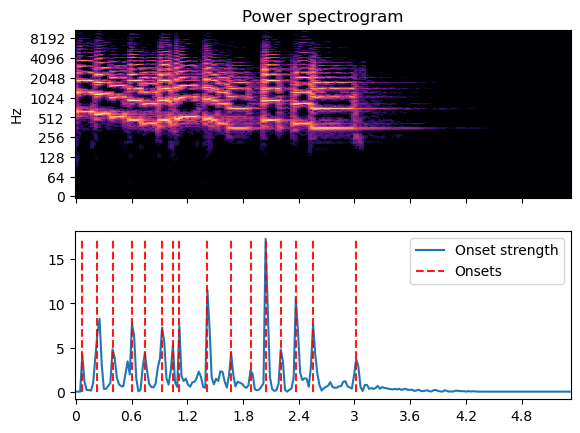

In [95]:
import matplotlib.pyplot as plt
D = np.abs(librosa.stft(y))
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         x_axis='time', y_axis='log', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
ax[1].plot(times, o_env, label='Onset strength')
ax[1].vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,
           linestyle='--', label='Onsets')
ax[1].legend()



In [33]:
from visual_midi import Plotter
from visual_midi import Preset
from pretty_midi import PrettyMIDI

preset = Preset(plot_width=850)
plotter = Plotter(preset, plot_max_length_bar=4)
plotter.plot(midi)
_ColorGroupMeta

ValueError: Unknown index 10 for color group '_ColorGroupMeta'

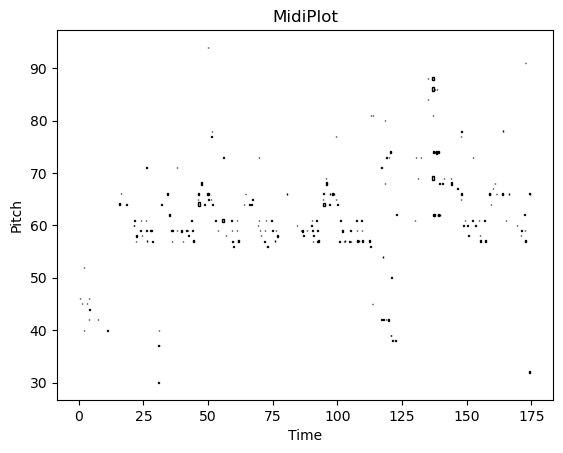

In [ ]:
# EXPERIMENT
# y, sr = librosa.load(librosa.ex('choice'))
def shift_audio(query_filename, steps = 4):
    y, sr = librosa.load(f"MTG-QBH/audio/{query_filename}")
    y_third = librosa.effects.pitch_shift(y, sr=sr, n_steps=steps)
    y_strech = librosa.effects.time_stretch(y,  rate=0.8)
    display(Audio(data=y, rate=sr))
    display(Audio(data=y_third, rate=sr))
    display(Audio(data= y_strech, rate=sr))
shift_audio("q3.wav",4)

# shift_audio("q3.wav",2)
# shift_audio("q3.wav",-12)
# shift_audio("q3.wav",12)

In [294]:

# y, sr = librosa.load(librosa.ex('choice'))
y, sr = librosa.load(f"MTG-QBH/audio/q3.wav")

In [295]:
_, beat_frames = librosa.beat.beat_track(y=y, sr=sr,
                                         hop_length=512)

In [296]:
beat_frames

array([  28,   55,   88,  125,  162,  194,  233,  266,  298,  328,  358,
        386,  414,  443,  473,  501,  531,  563,  597,  631,  663,  692,
        721,  750,  788,  825,  857,  890,  924,  958,  991, 1021, 1052,
       1083, 1114, 1145, 1176, 1208, 1240, 1267])

In [297]:
beat_samples = librosa.frames_to_samples(beat_frames)


In [298]:
beat_samples

array([ 14336,  28160,  45056,  64000,  82944,  99328, 119296, 136192,
       152576, 167936, 183296, 197632, 211968, 226816, 242176, 256512,
       271872, 288256, 305664, 323072, 339456, 354304, 369152, 384000,
       403456, 422400, 438784, 455680, 473088, 490496, 507392, 522752,
       538624, 554496, 570368, 586240, 602112, 618496, 634880, 648704])

In [299]:
intervals = librosa.util.frame(beat_samples, frame_length=2, hop_length=1).T



In [300]:
intervals

array([[ 14336,  28160],
       [ 28160,  45056],
       [ 45056,  64000],
       [ 64000,  82944],
       [ 82944,  99328],
       [ 99328, 119296],
       [119296, 136192],
       [136192, 152576],
       [152576, 167936],
       [167936, 183296],
       [183296, 197632],
       [197632, 211968],
       [211968, 226816],
       [226816, 242176],
       [242176, 256512],
       [256512, 271872],
       [271872, 288256],
       [288256, 305664],
       [305664, 323072],
       [323072, 339456],
       [339456, 354304],
       [354304, 369152],
       [369152, 384000],
       [384000, 403456],
       [403456, 422400],
       [422400, 438784],
       [438784, 455680],
       [455680, 473088],
       [473088, 490496],
       [490496, 507392],
       [507392, 522752],
       [522752, 538624],
       [538624, 554496],
       [554496, 570368],
       [570368, 586240],
       [586240, 602112],
       [602112, 618496],
       [618496, 634880],
       [634880, 648704]])

In [301]:
y_out = librosa.effects.remix(y, intervals[::-1])

In [ ]:
display(Audio(data= y, rate=sr))
display(Audio(data= y_out, rate=sr))